# >>>>>>>>>>>>>>>>> Machine Learning<<<<<<<<<<<<<<<<<

**Types of Machine Learning**

- 1) Supervised ML
- 2) Unsupervised ML
- 3) Semi Supervised ML
- 4) Reinforcement ML


**Supervised ML:** It consist of Input Data & Output Data this terms are known as Features(Independent variables/predictors) & Labels(target/class).

With supervised ML we can solve two types of problems.

- Regression (If the targer variables has Continues Data)
- Classification (If the label contains classes/categorical data)

**Unsupervised ML:** You will not get any Labels in data only feature. It contains Clustering data.

**Semi Supervised ML:** A combination of Supervised ML & Unsupervised ML.

**Reinforcement ML:** Used in Products such as Robots (AI Package), Autonomous vehicle. Reinforcement uses reinforcement learning (to learn from mistakes)  

# >>>>>>>>>>>>>>>>>>>Linear Regression<<<<<<<<<<<<<<<<<

Linear Regression is one of the most fundamental algorithms in the Machine Learning world. It is the door to the magical world ahead. But before proceeding with the algorithm, let's first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. A typical lifecycle diagram for a machine learning model looks like:

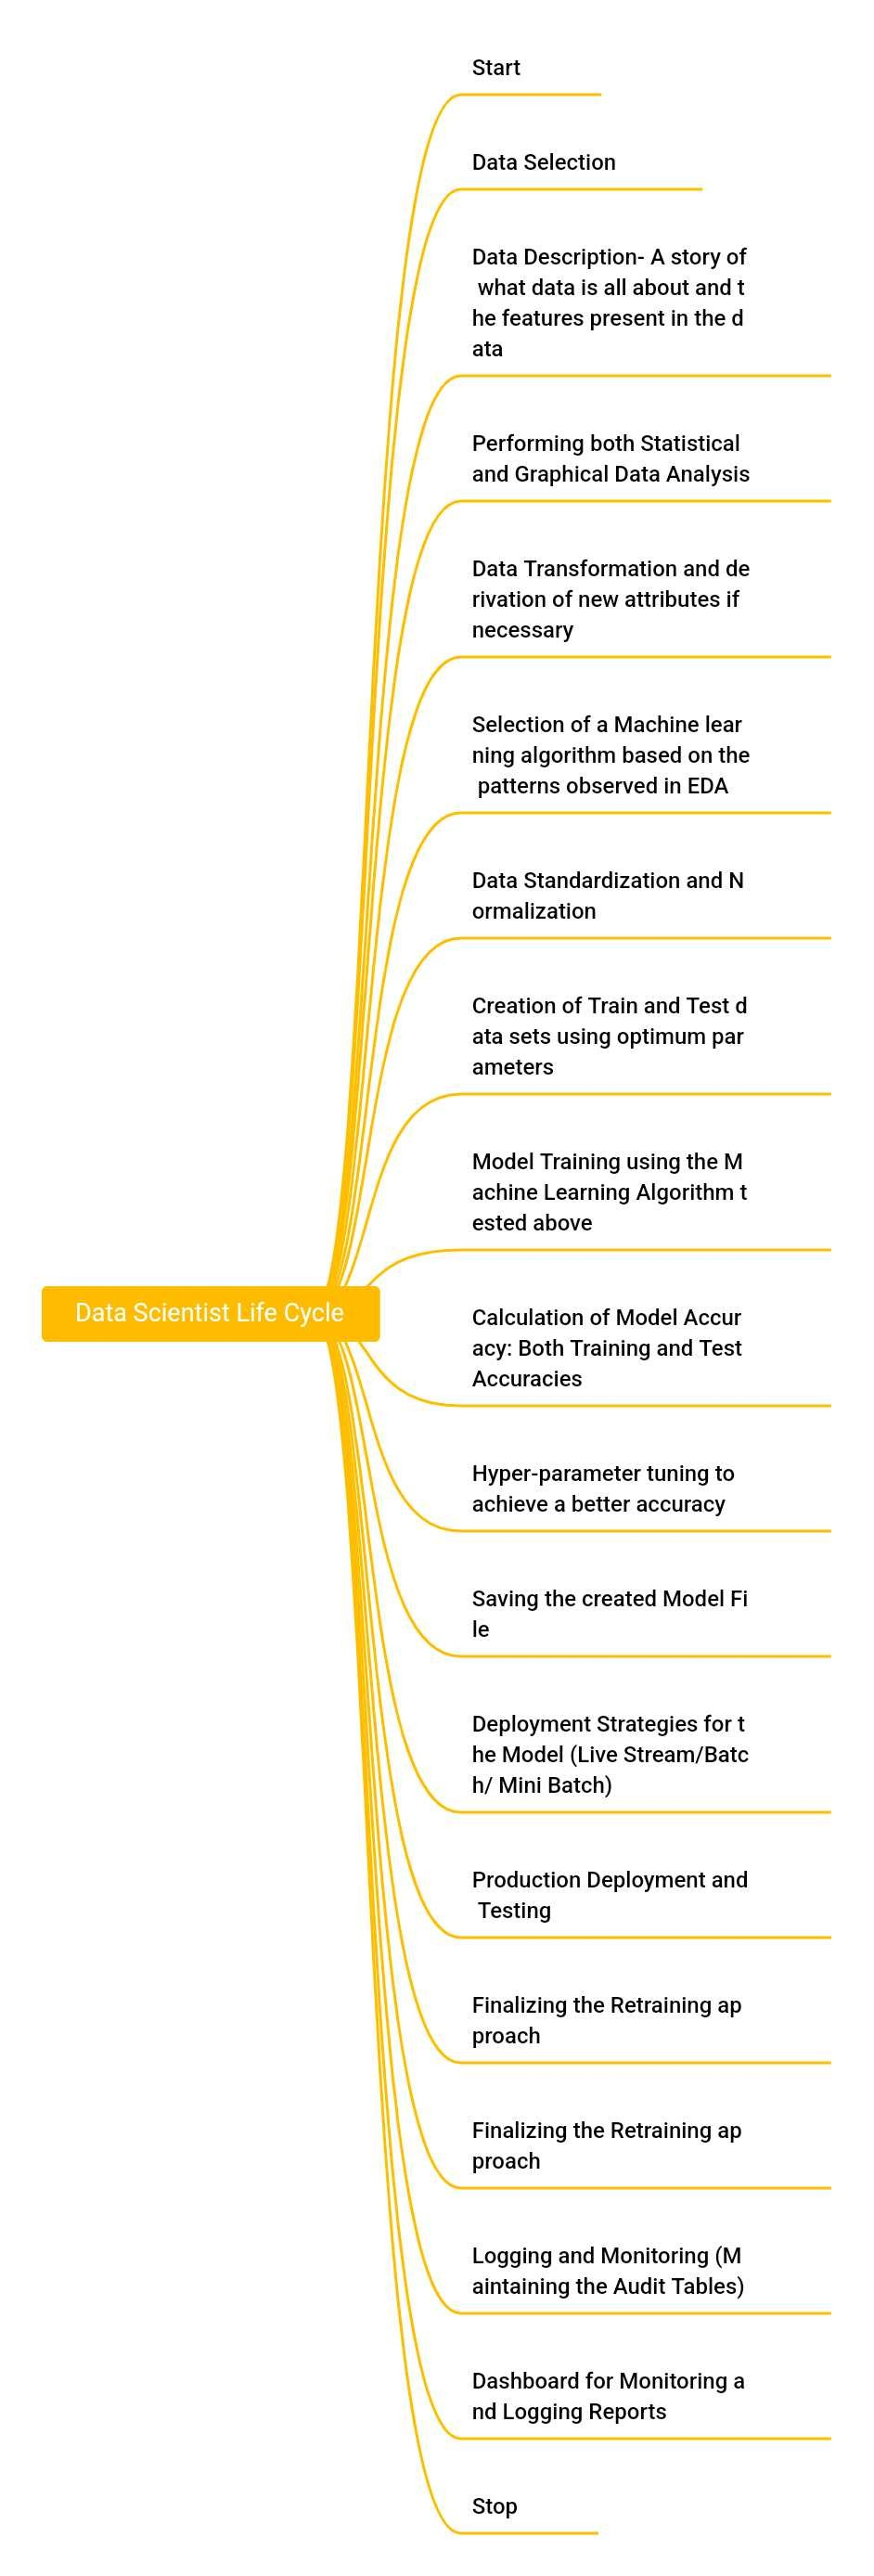

**What is Regression Analysis?**

- Regression in statistics is the process of predicting a Label(or Dependent Variable) based on the features(Independent Variables) at hand. Regression is used for time series modelling and finding the causal effect relationship between the variables and forecasting. For example, the relationship between the stock prices of the company and various factors like customer reputation and company annual performance etc. can be studied using regression.
- Regression analysis is an important tool for analysing and modelling data. Here, we fit a curve/line to the data points, in such a manner that the differences between the distance of the actual data points from the plotted curve/line is minimum. The topic will be explained in detail in the coming sections.

**The use of Regression**

Regression analyses the relationship between two or more features. Let's take an example:

Let's suppose we want to make an application which predicts the chances of admission a student to a foreign university. The benefits of using Regression analysis are as follows:

- It shows the significant relationships between the Lable (dependent variable) and the features (independent variable). 
- It shows the extent of the impact of multiple independent variables on the dependent variable.
- It can also measure these effects even if the variables are on a different scale.

These features enable the data scientists to find the best set of independent variables for predictions.


**Linear Regression**

Linear Regression is one of the most fundamental and widely known Machine Learning Algorithms which people start with. Building blocks of a Linear Regression Model are:
- Discreet/continuous independent variables 
- A best-fit regression line . Continuous dependent variable. i.e., A Linear Regression model predicts the dependent variable using a regression line based on the independent variables. 

The equation of the Linear Regression is:

Y=a+b*X + e (y = mx + c - where y = Prediction)

Where, a is the intercept, b is the slope of the line, and e is the error term. The equation above is used to predict the value of the target variable based on the given predictor variable(s).

# >>>>>>The Problem statement: (To learn how the model works)<<<<<<

- This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [37]:
# Importing neccessary methods

import pandas as pd
import matplotlib.pyplot as plt
import pickle  
# (Pickle is one of the format in which we are saving the model into. it's like saving the ML model in a specific file type)
%matplotlib inline
import warnings                     # disabling warnings
warnings.filterwarnings("ignore") 

In [17]:
data= pd.read_csv('Advertising.csv') # Reading the data files

In [8]:
data.head()  # Checking the first five rows from the dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
# TV, Radio, Newspaper are the Feature & Sales is Label
# Unnamed is a nominal data (which is a waste column that is not required neither it will help in predictionb)

In [10]:
data.shape

(200, 5)

In [11]:
data.info()  # Printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [12]:
data.isna().sum()  # Finding the count of missing values from different columns

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

###### Now, Visualize the relationship between the features and the response using scatterplots 

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

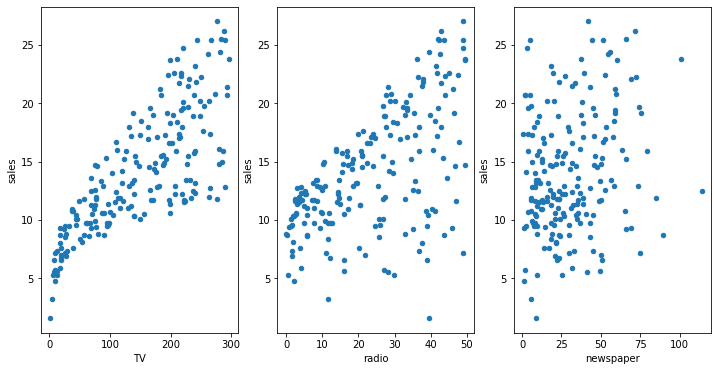

In [15]:
fig, axs = plt.subplots(1, 3)   # (subploting into 1 row and 3 columns)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0],figsize=(12,6)) 
# X = TV & Y = sales it should be on ax=axs(0) - selecting it to 0th index
data.plot(kind='scatter', x ='radio', y ='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

#Optional:     fig.savefig('testdata.jpg')  # To save the graph as JPG(Picture)

##### Questions about the data

A generic question shall be: 

- How the company should optimise the spends on advertising to maximise the sales?

These general questions might lead you to more specific questions:

- 1. What's the relationship between ads and sales? 
- 2. How prominent is that relationship? 
- 3. Which ad types contribute to sales? 
- 4. How each ad contributes to sales? 
- 5. Can sales be predicted based on the expense of the advertisement?

We will explore these questions below!

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad, Radio ad and the sales is almost a linear one. 

A linear relationship typically looks like:

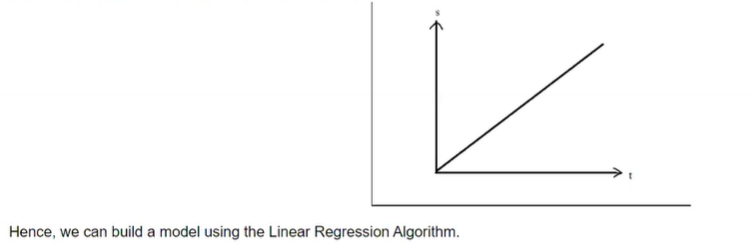

# >>>>>>>Simple Linear Regression<<<<<<<<<<
- Simple linear regression is used for data consisting of 1 Feature & 1 Lable

https://www.desmos.com/calculator/2rnggoa6a4

###### Simple Linear regression is a method for predicting a quantitative response using a single feature ("input variable"). The mathematical equation is:

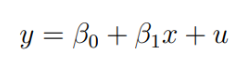

**What do terms represent?**

- y is the response or the target variable 
- x is the feature 
- B1, is the coefficient of 
- Bo, is the intercept

Bo and B1, are the **model coefficients**. To create a model, we must learn" the values of these coefficients. And once we have the value of these coefficients, we can use the model to predict the Sales!

**Estimating ("Learning") Model Coefficients**
The coefficients are estimated using the **least-squares criterion**, i.e., the best fit line has to be calculated that minimizes the sum of squared residuals (or "sum of squared errors").

#  -----------y = mx + b---------

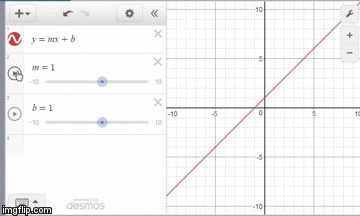

The above formula is nothing but linear regression formula which is y = mx + b or y = mx + c

Where,

- y = prediction
- m = slope/coefficient
- x = feature
- b = intercept

m = (The slope/coefficient of red line is called **"m"**) Slope will not change it's point from which it's moving

b = Intercept of red line is called **"b"** which will not change the angle of slope.

We need to find "m & b" the reason is that red line it self is **"Linear regression"**. where technical term for red line is **"Best fit line/ regression line"**

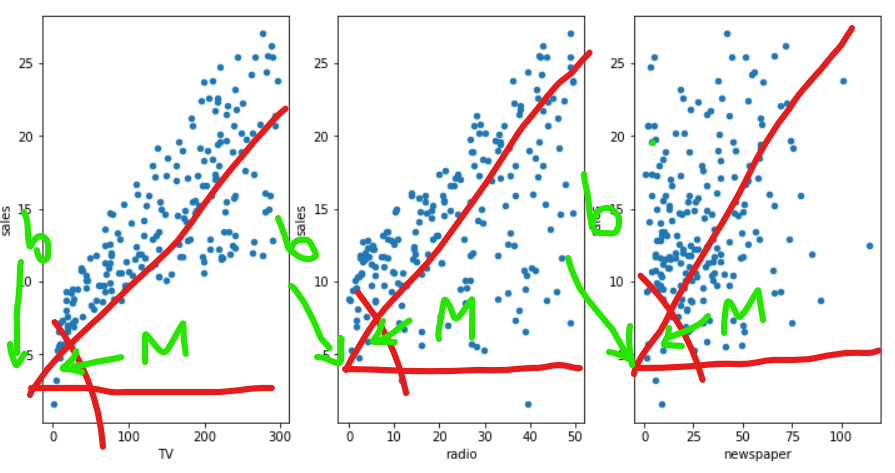

# The mathematics involved

###### Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

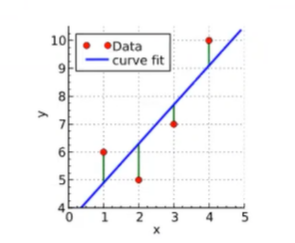

What elements are present in the diagram?

- The red points are the **observed values** of x and y.
- The blue line is the least **squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least squares line.

The general equation of a straight line is:

y = mx + b 

It means that if we have the value of m and b, we can predict all the values of y for corresponding x. During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line. But the question is:

**How Do you know this is the best fit line?**

The best fit line is obtained by minimizing the residual. Residual is the distance between the actual Y and the predicted Y, as shown below:

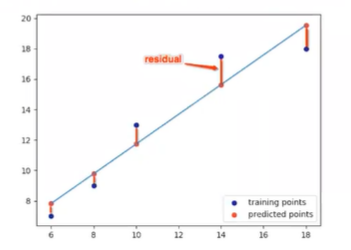

- Training points = actual data
- Predictive points = predictive data

Mathematically, Residual is:

###### **r = y - (mx + b)**

Hence, the sum of the square of residuals is:
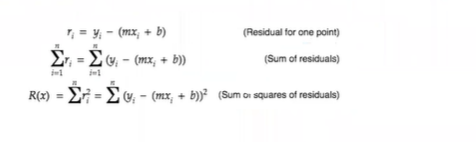

###### Gradient Descent

But as the residual's minima is dependent on two variables m and b, it becomes a Paraboloid and the appropriate m and b are calculated using _ *Gradient Descent*_ as shown below:
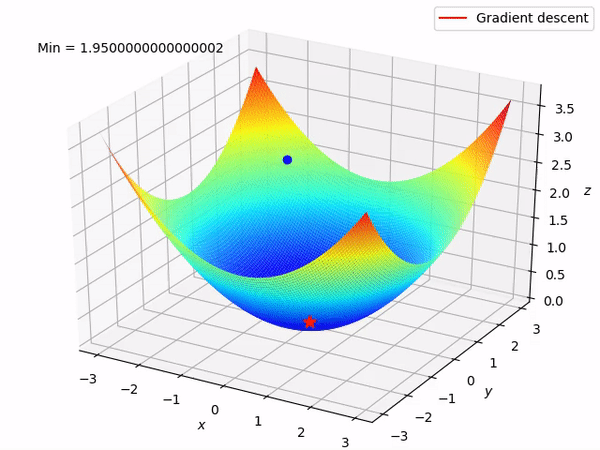

# >>>>>>>>Building Simple linear regression model<<<<<<<<<

This method is used for data containing 1 feature + 1 label

In [18]:
# Create X = feature and y = label

x = data[['TV']]   # giving x a feature that is 'TV'
y = data.sales     # giving y a label here 'sales'

# Follow the usual sklearn pattern: import, instantiate, fit

from sklearn.linear_model import LinearRegression          

#importing linearregression model from sci-kit learning (sklearn) which is a free software machine learning library

LM = LinearRegression()    # defining the linear regression model as LM

LM.fit(x,y)    
# .fit(feature,label)/ .fit(x,y)  
# .fit(x,y) method will initiate training/understanding/learning pattern to Model so that it can predict

LinearRegression()

In [21]:
# Print intercept and coefficients

print(LM.intercept_)   # This is c from (y = mx + c) which is intercept point of the best fit line/ regression line
print(LM.coef_)        # This is m from (y = mx + c) which is slope/coefficient angle of the best fit line/ regression line

7.032593549127693
[0.04753664]


## Using manual method to predict just to see how the model works behind the scenes

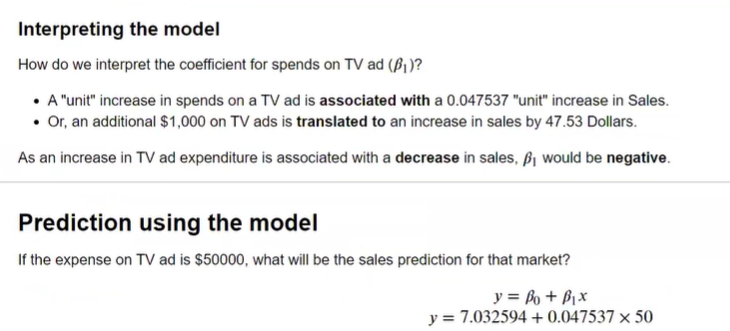

In [23]:
# Calculating the prediction

7.032593549127693 + 0.04753664*50

9.409425549127693

Thus, we would predict Sales of **9,409** in that market.

Let's do the same thing using code.

Here, y = 9,409

In [33]:
# Let's create a DataFrame since the model expects it

X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [38]:
# use the model to make predictions on a new value.
LM.predict([[50]])    # .predict method will predict data

array([9.40942557])

# Model Confidence

**How Well Does the Model Fit the data?**

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains theproportion of variance, i.e., the **proportion of variance** in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model.

**R² statistics**

The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance explained—and so it always takes on a value between 0 and 1. In simple words, it represents how much of our data is being explained by our model. For example, **R²** statistic = 0.75, it says that our model fits 75% of the total data set. Similarly, if it is o, it means none of the data points is being explained and a value of 1 represents 100% data explanation. Mathematically **R²** statistic is calculated as:
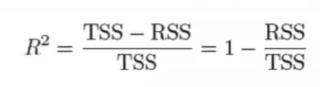

Where RSS is the Residual Sum of squares and is given as:

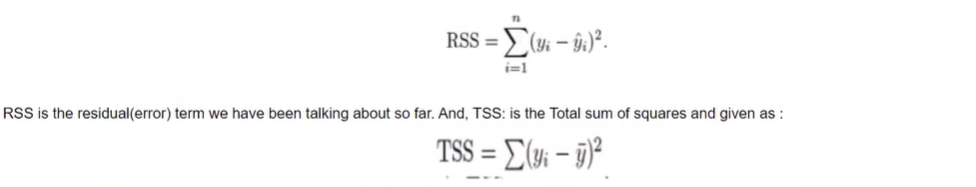

TSS os calculated when we consider the line passing through the mean value of y, to be the best fit line. Just like RSS. we calculate the error term when the best fit line is the line passing through the mean value of y and we get the value of TSS.
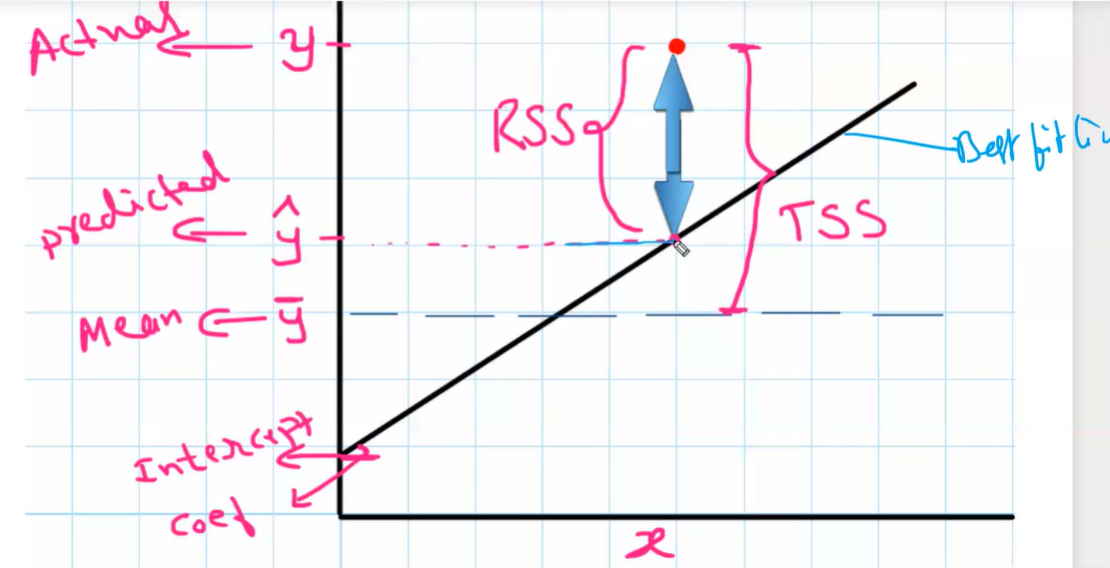
The closer the value of R2 is to 1 the better the model fits out data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse that the average best fit line.

# Metric to check model performance (r2_score)

To check if we have predicted accuratly with help of r2_score by comparing actual sales data & our predicted data

In [40]:
from sklearn.metrics import r2_score

In [42]:
# pass all TV records and predict sales
predicted_sales = LM.predict(x)

In [43]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [44]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [45]:
# Let's compare original sales numbers with our model predicted sales

r2_score(y_true=y, y_pred=predicted_sales)

0.611875050850071

In [46]:
0.611875050850071*100

61.187505085007096

So, that we can say that our model has predicted with the accuracy of 61.18% 

# Adjusted R2 statistics

As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn't mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data. Let's understand this with an example:
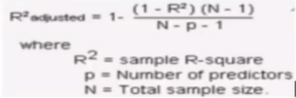
We can see that R2 always increases with an increase in the number of independent variables. Thus, it doesn't give a better picture and so we need Adjusted R2 value to keep this in check. Mathematically, it is calculated as:

In the equation above, when p = 0, we can see that adjusted R2 becomes equal to R2. Thus, adjusted R2 will always be less than or equal to R2, and it penalises the excess of independent variables which do not affect the dependent variable.

Is it a "good" R-squared value? Now, that's hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for comparing different models.

# >>>>>>>>>>>>>>>>>>Multiple Linear Regression<<<<<<<<<<<<<<

This method is used for data containing multiple features

Till now, we have created the model based on only one feature. Now, we'll include multiple features and create a model to see the relationship between those features and the label column. This is called Multiple Linear Regression.
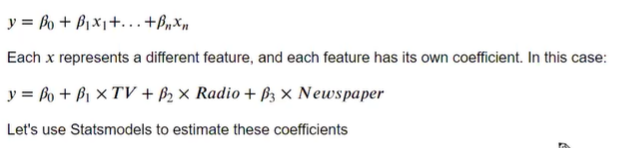

In [53]:
data.head()  # Using below data for example which has 3 features (TV, Radio, Newspaper) and 1 lable (Sales)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

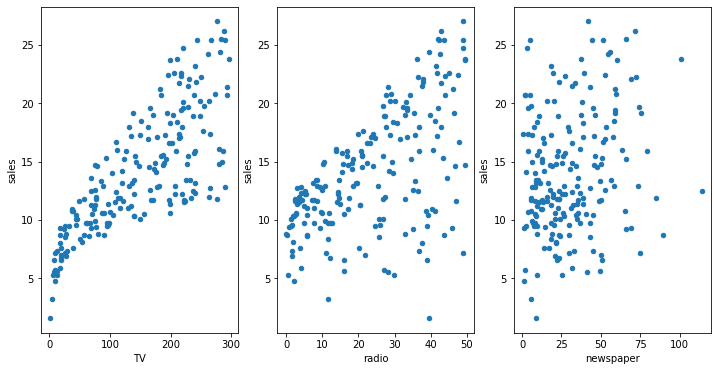

In [52]:
fig, axs = plt.subplots(1, 3)   # (subploting into 1 row and 3 columns)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0],figsize=(12,6)) 
# X = TV & Y = sales it should be on ax=axs(0) - selecting it to 0th index
data.plot(kind='scatter', x ='radio', y ='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

#Optional:     fig.savefig('testdata.jpg')  # To save the graph as JPG(Picture)

In [50]:
# Creat x and y

x = data[['TV','radio','newspaper']]
y = data.sales

LM = LinearRegression()    # linearregression model
LM.fit(x, y)               # model will learn from x & y data

# print intercept and coefficients  # Creating/assigning m & b (y = mx + b) which is slope & intercept of best fit line
print('intercept :  ->', LM.intercept_)
print('TV :         ->', LM.coef_[0])
print('Radio :      ->', LM.coef_[1])
print('Newspaper :      ->', LM.coef_[2])

intercept :  -> 2.9388893694594067
TV :         -> 0.04576464545539761
Radio :      -> 0.18853001691820462
Newspaper :      -> -0.0010374930424762881


How do we interpret these coefficients? If we look at the coefficients, the coefficients for the newspapers spends in negative. It means that the money spent for newspaper advertisements is not contributting in a positive way to the sales

# Feature Selection

How do i decide **which feature have to be included** in a linear model? Here's one idea.

- Check if the R-squared value goes up when you add new predictors to the model.

In [54]:
# Preparing data for R2_score on TV and Radio as we can see they are positively related (co-efficient)
x = data[['TV','radio']]
y = data.sales

In [55]:
# Let's feed features and label and train the model
LM.fit(x,y)

LinearRegression()

In [57]:
# Check the R2
predicted_sales = LM.predict(x)
r2_score(y,predicted_sales)

0.8971942610828956

In [58]:
# Let's do the same for all the features
x = data[['TV','radio','newspaper']]
y = data.sales

# training
LM.fit(x,y)

# r2
predicted_sales = LM.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522

Selecting the model with the highest value of R-squared is not a correct approach as the value of R-squared shall always increase whenever a new feature is taken for consideration even if the feature is unrelated to the response.

The alternative is to use **adjusted R-squared** which penalises the model complexity (to control overfitting), but this again generally under-penalizes complexity.

a better approach to feature selection is **Cross-validation**. It provides a more reliable way to choose which of the created models will best **generalise** as it better estimates of out-of-sample error. An advantage is that the cross-validation method can be applied to any machine learning model and the scikit-learn package provides extensive functionality for that.